>using data augumentation to  increase the accuracy

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img



In [2]:
batch_size = 16
# this is the data augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen= ImageDataGenerator(rescale=1./255)
# this is a generator that will read pictures found in subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen. flow_from_directory(
'CatvsDog/train',
# this is the target directory
target_size=(150, 150), # all images will be resized to 150x150 
batch_size=batch_size,
class_mode= 'binary')

Found 17526 images belonging to 2 classes.


In [3]:
# this is a similar generator, for validation data
validation_generator = test_datagen. flow_from_directory('CatvsDog/test', target_size=(150, 150), batch_size=batch_size, class_mode= 'binary')

Found 2290 images belonging to 2 classes.


In [5]:
#generator (used for  batch conversion of the large file to get  in RAM  )
train_ds=keras.utils.image_dataset_from_directory(
    directory="CatvsDog/train"
    ,labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(256,256)
)

test_ds=keras.utils.image_dataset_from_directory(
    directory="CatvsDog/test"
    ,labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(256,256)
)

Found 17526 files belonging to 2 classes.
Found 2290 files belonging to 2 classes.


In [6]:
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=test_ds.map(process)

In [7]:
model = Sequential ()
model. add (Conv2D(32, kernel_size=(3,3), padding='valid', activation= 'relu', input_shape= (150, 150, 3)) )
model.add(BatchNormalization())
model. add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model. add (Conv2D(32, kernel_size=(3,3), padding='valid', activation= 'relu') )
model.add(BatchNormalization())
model. add (MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model. add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model. add (MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model. add (Flatten())
model. add (Dense(64, activation='relu'))
model.add(Dropout(0.5))
model. add (Dense(1, activation='sigmoid'))

/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,213,025 (4.63 MB)

 Trainable params: 1,212,769 (4.63 MB)

 Non-trainable params: 256 (1.00 KB)

In [9]:
model. compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'],jit_compile=True)

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=2000,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=800
)

Epoch 1/25


/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-10-11 01:25:47.467921: I external/local_xla/xla/service/service.cc:163] XLA service 0x71cddcd00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-10-11 01:25:47.467955: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Host, Default Version
2025-10-11 01:25:47.506235: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


   2/2000 ━━━━━━━━━━━━━━━━━━━━ 2:43 82ms/step - accuracy: 0.5000 - loss: 1.7753

I0000 00:00:1760125247.982300 4276576 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1096/2000 ━━━━━━━━━━━━━━━━━━━━ 1:14 82ms/step - accuracy: 0.6907 - loss: 0.7863

/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 93s 46ms/step - accuracy: 0.7055 - loss: 0.6282 - val_accuracy: 0.5319 - val_loss: 0.6810
Epoch 2/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 92s 46ms/step - accuracy: 0.7194 - loss: 0.5353 - val_accuracy: 0.6402 - val_loss: 0.6102
Epoch 3/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 94s 47ms/step - accuracy: 0.7432 - loss: 0.4964 - val_accuracy: 0.5441 - val_loss: 0.6862
Epoch 4/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 95s 47ms/step - accuracy: 0.7621 - loss: 0.4621 - val_accuracy: 0.7314 - val_loss: 0.5978
Epoch 5/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 93s 46ms/step - accuracy: 0.7689 - loss: 0.4432 - val_accuracy: 0.7406 - val_loss: 0.4977
Epoch 6/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 92s 46ms/step - accuracy: 0.7741 - loss: 0.4252 - val_accuracy: 0.6659 - val_loss: 0.6480
Epoch 7/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 92s 46ms/step - accuracy: 0.7816 - loss: 0.4066 - val_accuracy: 0.7764 - val_loss: 0.5009
Epoch 8/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 92s 46ms/step - accuracy: 0.8396 - loss: 0.37

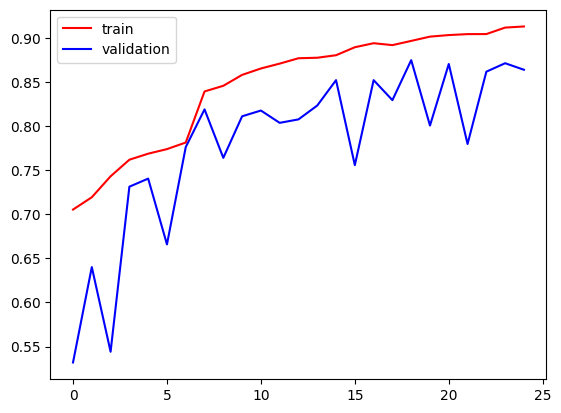

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red',label='train' )
plt.plot (history.history['val_accuracy'], color= 'blue', label='validation')
plt. legend()
plt.show()

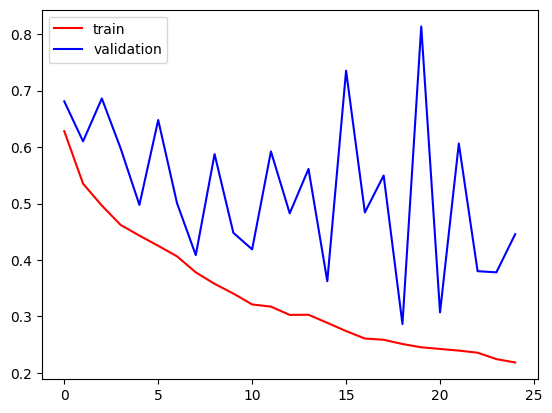

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red',label='train' )
plt.plot (history.history['val_loss'], color= 'blue', label='validation')
plt. legend()
plt.show()

In [14]:
import cv2

In [17]:
test_image=cv2.imread('dog.jpg')

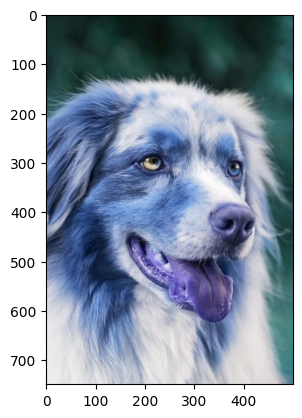

In [18]:
plt.imshow(test_image)

In [22]:
test_image=cv2.resize(test_image,(150,150))

In [23]:
test_input=test_image.reshape(1,150,150,3)

In [24]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[1.]], dtype=float32)

In [26]:
predictions = model.predict(test_input)  # shape: (batch_size, 1) or (batch_size, num_classes)
if predictions[0] ==1 :
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Dog
